## **Mengimport Library**

In [1]:
import pandas as pd
import re
import nltk
import numpy as np
# Melakukan proses stemming (penggunaan kata dasar)
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
ps = PorterStemmer()

In [2]:
# Mendownload daftar kata yang ada (vocabulary)
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Membaca Dataset**

In [3]:
# Set the max columns to none

pd.set_option('display.max_columns', None)

In [4]:
# Login Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
data = pd.read_csv('/content/gdrive/MyDrive/Youtube/Youtube/data2.csv',  encoding='latin-1')
data.head()

Unnamed: 0                                            comment     label  \
0           0        Santai tapi pasti... Sangat tegas narasinya  Negative   
1           1  Aamiin.... Giliran  pk ganjar  nolak israel  d...  Negative   
2           2  ÃÂ @MbahMu9829ÃÂ masih ada aja ya orang deng...  Negative   
3           3  Ã¢â¬â¹ÃÂ @MbahMu9829ÃÂ klau bukan moncong ...  Negative   
4           4  Amangnya siapa yang ngejaja??? Mau merdeka sil...  Negative   

                                                text  \
0           santai tapi pasti sangat tegas narasinya   
1  aamiin giliran  pk ganjar  nolak israel  di  u...   
2  Â mbahmu9829Â masih ada aja ya orang dengki ka...   
3  Â mbahmu9829Â klau bukan moncong putih pasti p...   
4  amangnya siapa yang ngejaja mau merdeka silahk...   

                                             cleaned  \
0       penuturannya santai namun pasti sangat tegas   
1  Aamiin, Giliran PK Ganjar yang Tolak Israel di...   
2  Nenekmu masih punya orang pendendam seperti in...   
3  Jika kakek Anda tidak berhidung putih, dia pas...   
4  Sayangnya, siapa pun yang mencoba untuk mandir...   

                                           tokenized  \
0  ['penuturannya', 'santai', 'namun', 'pasti', '...   
1  ['Aamiin', ',', 'Giliran', 'PK', 'Ganjar', 'ya...   
2  ['Nenekmu', 'masih', 'punya', 'orang', 'penden...   
3  ['Jika', 'kakek', 'Anda', 'tidak', 'berhidung'...   
4  ['Sayangnya', ',', 'siapa', 'pun', 'yang', 'me...   

                                        no_stopwords  
0                         ['penuturannya', 'santai']  
1  ['Aamiin', ',', 'Giliran', 'PK', 'Ganjar', 'To...  
2  ['Nenekmu', 'orang', 'pendendam', 'kawan', 'ha...  
3  ['Jika', 'kakek', 'Anda', 'berhidung', 'putih'...  
4  ['Sayangnya', ',', 'mencoba', 'mandiri', ',', ...

In [9]:
dataku = data.copy()

## **Cek missing value dan data duplikat**

In [10]:
def cek_data(df):
    # Mengecek data yang hilang
    missing_data = df.isnull().sum()
    if missing_data.sum() > 0:
        print("Data yang Hilang:")
        print(missing_data[missing_data > 0])
    else:
        print("Tidak ada data yang hilang.")

    # Mengecek data duplikat
    duplicate_data = df[df.duplicated()]
    if not duplicate_data.empty:
        print("\nData Duplikat:")
        print(duplicate_data)
    else:
        print("\nTidak ada data duplikat.")

# Memanggil fungsi cek_data
cek_data(dataku)


Tidak ada data yang hilang.

Tidak ada data duplikat.


In [11]:
# Menghapus baris dengan nilai duplikat
dataku = dataku.drop_duplicates()
# Get the indexes of the rows to be dropped
error_index = dataku[dataku['comment'] == '#ERROR!'].index

# Drop the rows from the DataFrame
dataku = dataku.drop(error_index)

In [12]:
# Reset index dari dataframe
dataku = dataku.reset_index(drop=True)

# Mengubah kolom label menjadi kategori
dataku['comment'] = dataku['comment'].astype('category')

## **Preprocessing**

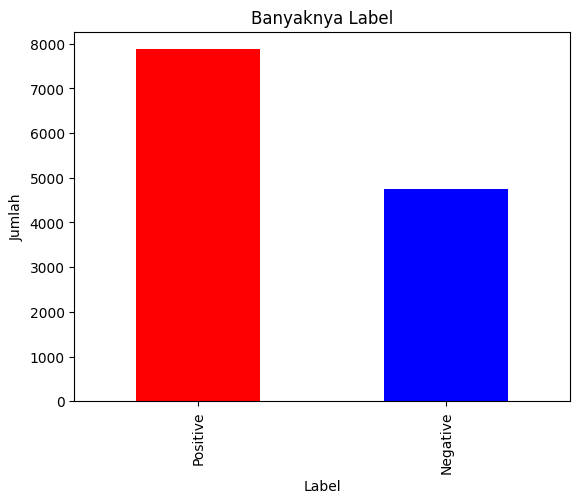

In [13]:
# Visualisasi banyaknya label
label_counts = dataku['label'].value_counts()
label_counts.plot(kind='bar', color=['red','blue'])

plt.title('Banyaknya Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

### **Spelling check dengan KAMUSALAY**

In [15]:
df_kamusalay = pd.read_csv('/content/new_kamusalay.csv', encoding='iso-8859-1', header=None)
df_kamusalay.head()

0                         1
0  anakjakartaasikasik  anak jakarta asyik asyik
1         pakcikdahtua         pak cik sudah tua
2       pakcikmudalagi         pak cik muda lagi
3          t3tapjokowi              tetap jokowi
4                   3x                 tiga kali

In [16]:
iter = 0
def correct_sentence(sentence, corrections_df):
    global iter
    for index, row in corrections_df.iterrows():
        typo = row[0]
        if typo not in sentence:
            continue
        corrected = row[1]
        sentence = re.sub(r'\b' + typo + r'\b', corrected, sentence, flags=re.IGNORECASE)
    iter += 1
    if iter%100 == 0:
        print("Data yang sudah diproses : " + str(iter) + "/" + str(len(dataku)))
    return sentence

df_tweet_kamusalay = dataku.copy()
df_tweet_kamusalay = dataku.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_tweet_kamusalay['tweet_kamusalay'] = dataku['comment'].apply(lambda x: correct_sentence(x, df_kamusalay))

Data yang sudah diproses : 100/12617
Data yang sudah diproses : 200/12617
Data yang sudah diproses : 300/12617
Data yang sudah diproses : 400/12617
Data yang sudah diproses : 500/12617
Data yang sudah diproses : 600/12617
Data yang sudah diproses : 700/12617
Data yang sudah diproses : 800/12617
Data yang sudah diproses : 900/12617
Data yang sudah diproses : 1000/12617
Data yang sudah diproses : 1100/12617
Data yang sudah diproses : 1200/12617
Data yang sudah diproses : 1300/12617
Data yang sudah diproses : 1400/12617
Data yang sudah diproses : 1500/12617
Data yang sudah diproses : 1600/12617
Data yang sudah diproses : 1700/12617
Data yang sudah diproses : 1800/12617
Data yang sudah diproses : 1900/12617
Data yang sudah diproses : 2000/12617
Data yang sudah diproses : 2100/12617
Data yang sudah diproses : 2200/12617
Data yang sudah diproses : 2300/12617
Data yang sudah diproses : 2400/12617
Data yang sudah diproses : 2500/12617
Data yang sudah diproses : 2600/12617
Data yang sudah dipro

In [17]:
df_tweet_kamusalay.head()

Unnamed: 0                                            comment     label  \
0           0        santai tapi pasti... sangat tegas narasinya  negative   
1           1  aamiin.... giliran  pk ganjar  nolak israel  d...  negative   
2           2  ãâ @mbahmu9829ãâ masih ada aja ya orang deng...  negative   
3           3  ã¢â¬â¹ãâ @mbahmu9829ãâ klau bukan moncong ...  negative   
4           4  amangnya siapa yang ngejaja??? mau merdeka sil...  negative   

                                                text  \
0           santai tapi pasti sangat tegas narasinya   
1  aamiin giliran  pk ganjar  nolak israel  di  u...   
2  â mbahmu9829â masih ada aja ya orang dengki ka...   
3  â mbahmu9829â klau bukan moncong putih pasti p...   
4  amangnya siapa yang ngejaja mau merdeka silahk...   

                                             cleaned  \
0       penuturannya santai namun pasti sangat tegas   
1  aamiin, giliran pk ganjar yang tolak israel di...   
2  nenekmu masih punya orang pendendam seperti in...   
3  jika kakek anda tidak berhidung putih, dia pas...   
4  sayangnya, siapa pun yang mencoba untuk mandir...   

                                           tokenized  \
0  ['penuturannya', 'santai', 'namun', 'pasti', '...   
1  ['aamiin', ',', 'giliran', 'pk', 'ganjar', 'ya...   
2  ['nenekmu', 'masih', 'punya', 'orang', 'penden...   
3  ['jika', 'kakek', 'anda', 'tidak', 'berhidung'...   
4  ['sayangnya', ',', 'siapa', 'pun', 'yang', 'me...   

                                        no_stopwords  \
0                         ['penuturannya', 'santai']   
1  ['aamiin', ',', 'giliran', 'pk', 'ganjar', 'to...   
2  ['nenekmu', 'orang', 'pendendam', 'kawan', 'ha...   
3  ['jika', 'kakek', 'anda', 'berhidung', 'putih'...   
4  ['sayangnya', ',', 'mencoba', 'mandiri', ',', ...   

                                     tweet_kamusalay  
0        Santai tapi pasti... Sangat tegas narasinya  
1  Aamiin.... Giliran  pak ganjar  menolak israel...  
2  ÃÂ @MbahMu9829ÃÂ masih ada saja ya orang den...  
3  Ã¢â¬â¹ÃÂ @MbahMu9829ÃÂ kalau bukan moncong...  
4  Amangnya siapa yang ngejaja??? Mau merdeka sil...

In [ ]:
df_tweet_kamusalay.to_csv('data_kamusalay.csv')

## **Checkpoint**

In [ ]:
data = pd.read_csv('/content/data_kamusalay.csv')

In [ ]:
dataku = data.copy()

In [ ]:
# Memeriksa daftar kata di stopwords
inggris = stopwords.words('english')
indo = stopwords.words('indonesian')

In [ ]:
corpus = []
for i in range(0, len(dataku)):
    review = re.sub('[^a-zA-Z]', ' ', dataku['tweet_kamusalay'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in inggris]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
data_comment = pd.DataFrame({'Hasil_prepo':corpus})
data_comment['sebelum_prepo']=dataku['comment']

In [ ]:
data_comment

Hasil_prepo  \
0                santai tapi pasti sangat tega narasinya   
1      aamiin giliran pak ganjar menolak israel di u ...   
2      mbahmu masih ada saja ya orang dengki kayak ag...   
3      mbahmu kalau bukan moncong putih pasti pemjila...   
4      amangnya siapa yang ngejaja mau merdeka silaka...   
...                                                  ...   
26466  orang yahudi kristen dan muslim yang belum per...   
26467  user jangan asal berbicara ndasmu congor kamu ...   
26468  user hati hati bisu tidak dan lagi bosan duh x...   
26469  user user user user bom yang real mudah terdet...   
26470  user mana situ memberi itu cuma foto ya kutil ...   

                                           sebelum_prepo  
0            santai tapi pasti... sangat tegas narasinya  
1      aamiin.... giliran  pk ganjar  nolak israel  d...  
2      ãâ @mbahmu9829ãâ masih ada aja ya orang deng...  
3      ã¢â¬â¹ãâ @mbahmu9829ãâ klau bukan moncong ...  
4      amangnya siapa yang ngejaja??? mau merdeka sil...  
...                                                  ...  
26466  orang yahudi, kristen dan muslim yang belum pe...  
26467  user jangan asal ngomong ndasmu. congor lu yg ...  
26468  user hati hati bisu :( .g\n\nlagi bosan huft \...  
26469  user user user user bom yang real mudah terdet...  
26470  user mana situ ngasih(": itu cuma foto ya kuti...  

[26471 rows x 2 columns]

## **Prepprocessing manual**

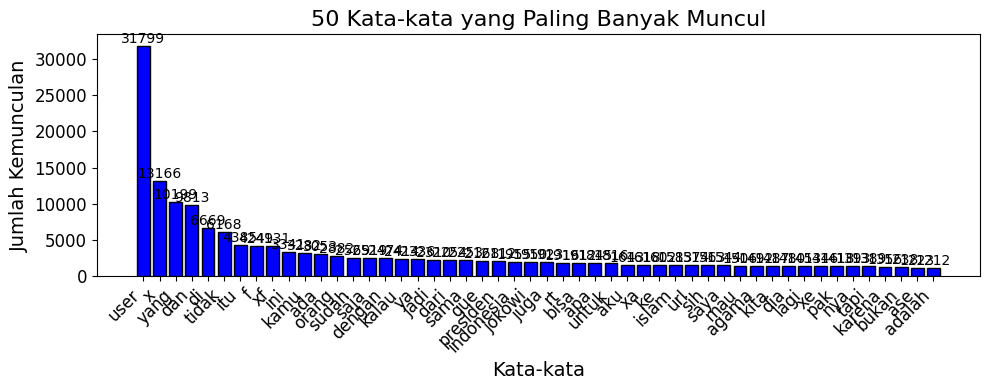

In [ ]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = data_comment['Hasil_prepo'].str.split(expand=True).stack().value_counts()

# Memilih 20 kata teratas
top_words = word_counts.head(50)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(10, 4))
bars = plt.bar(top_words.index, top_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('50 Kata-kata yang Paling Banyak Muncul', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

In [ ]:
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace(' x ', '', case=False)
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace(' f ', '', case=False)
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace(' xf ', '', case=False)
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace(' user ', '', case=False)
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace('user ', '', case=False)
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace(' user ', '', case=False)
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace(' xffx ', '', case=False)

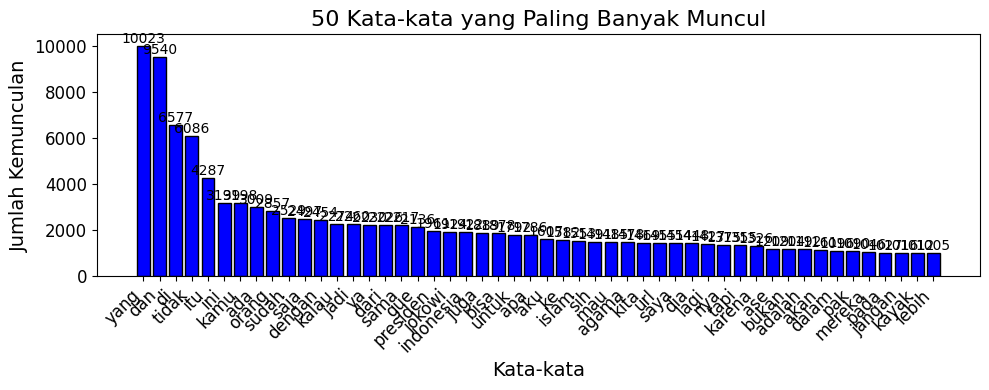

In [ ]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = data_comment['Hasil_prepo'].str.split(expand=True).stack().value_counts()

# Memilih 20 kata teratas
top_words = word_counts.head(50)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(10, 4))
bars = plt.bar(top_words.index, top_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('50 Kata-kata yang Paling Banyak Muncul', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

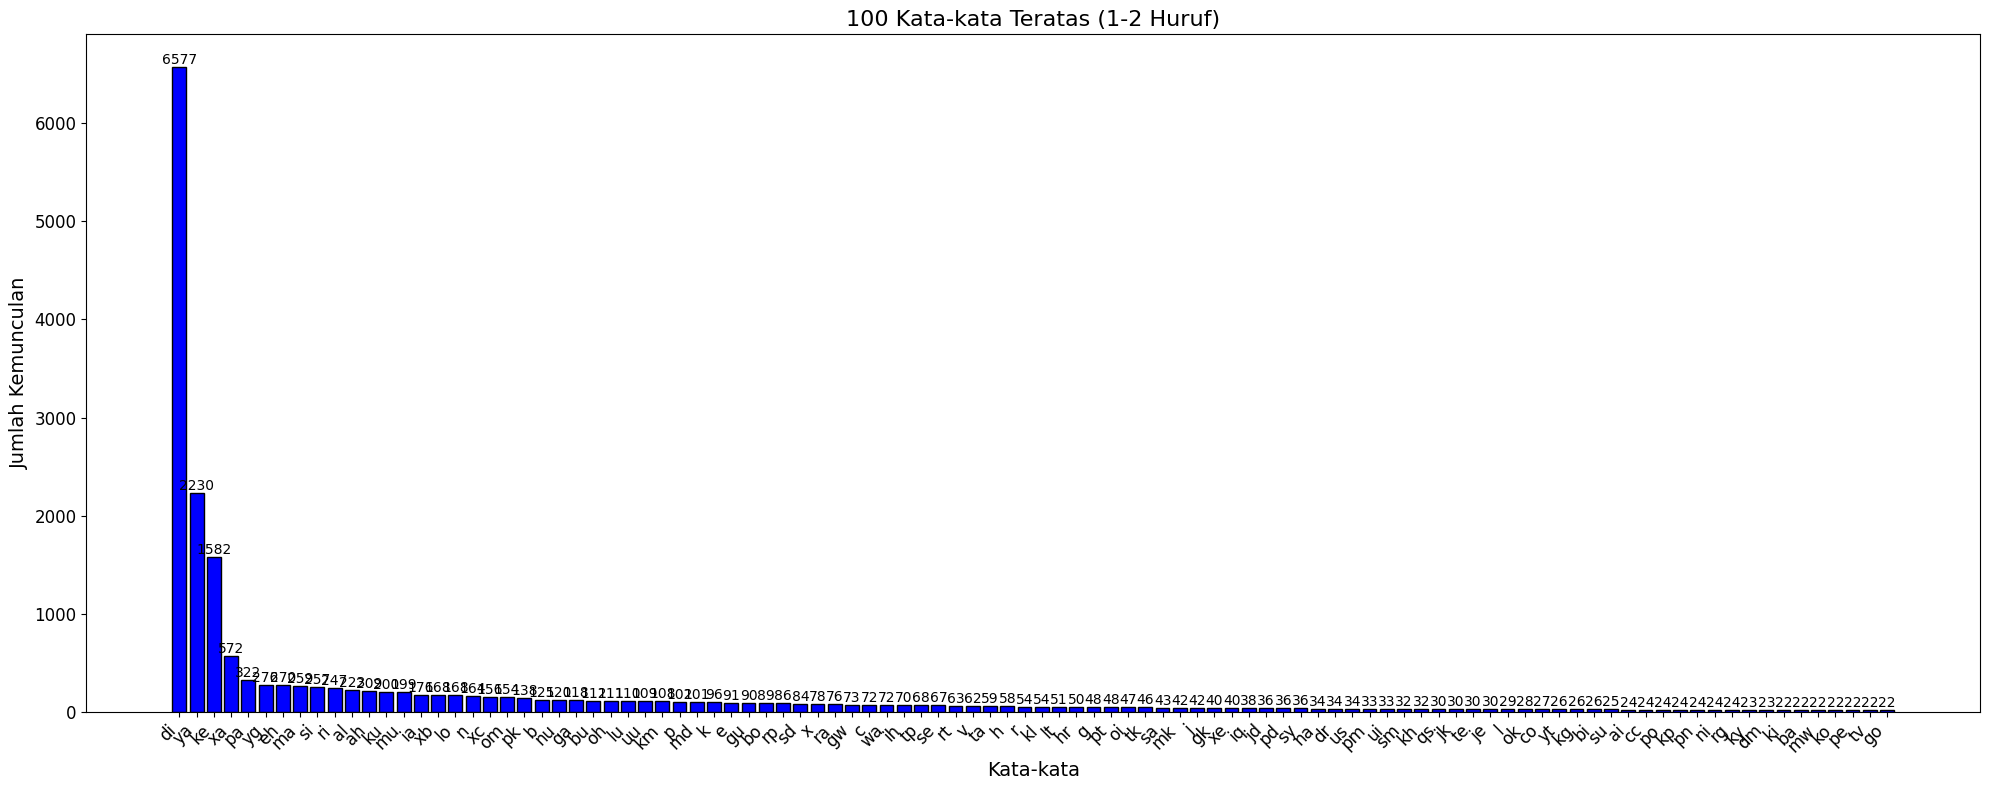

In [ ]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = data_comment['Hasil_prepo'].str.split(expand=True).stack().value_counts()

# Memilih 50 kata teratas yang hanya terdiri dari 2 huruf
filtered_words = word_counts[(word_counts.index.str.len() <= 2)].head(100)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(20, 8))
bars = plt.bar(filtered_words.index, filtered_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('100 Kata-kata Teratas (1-2 Huruf)', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


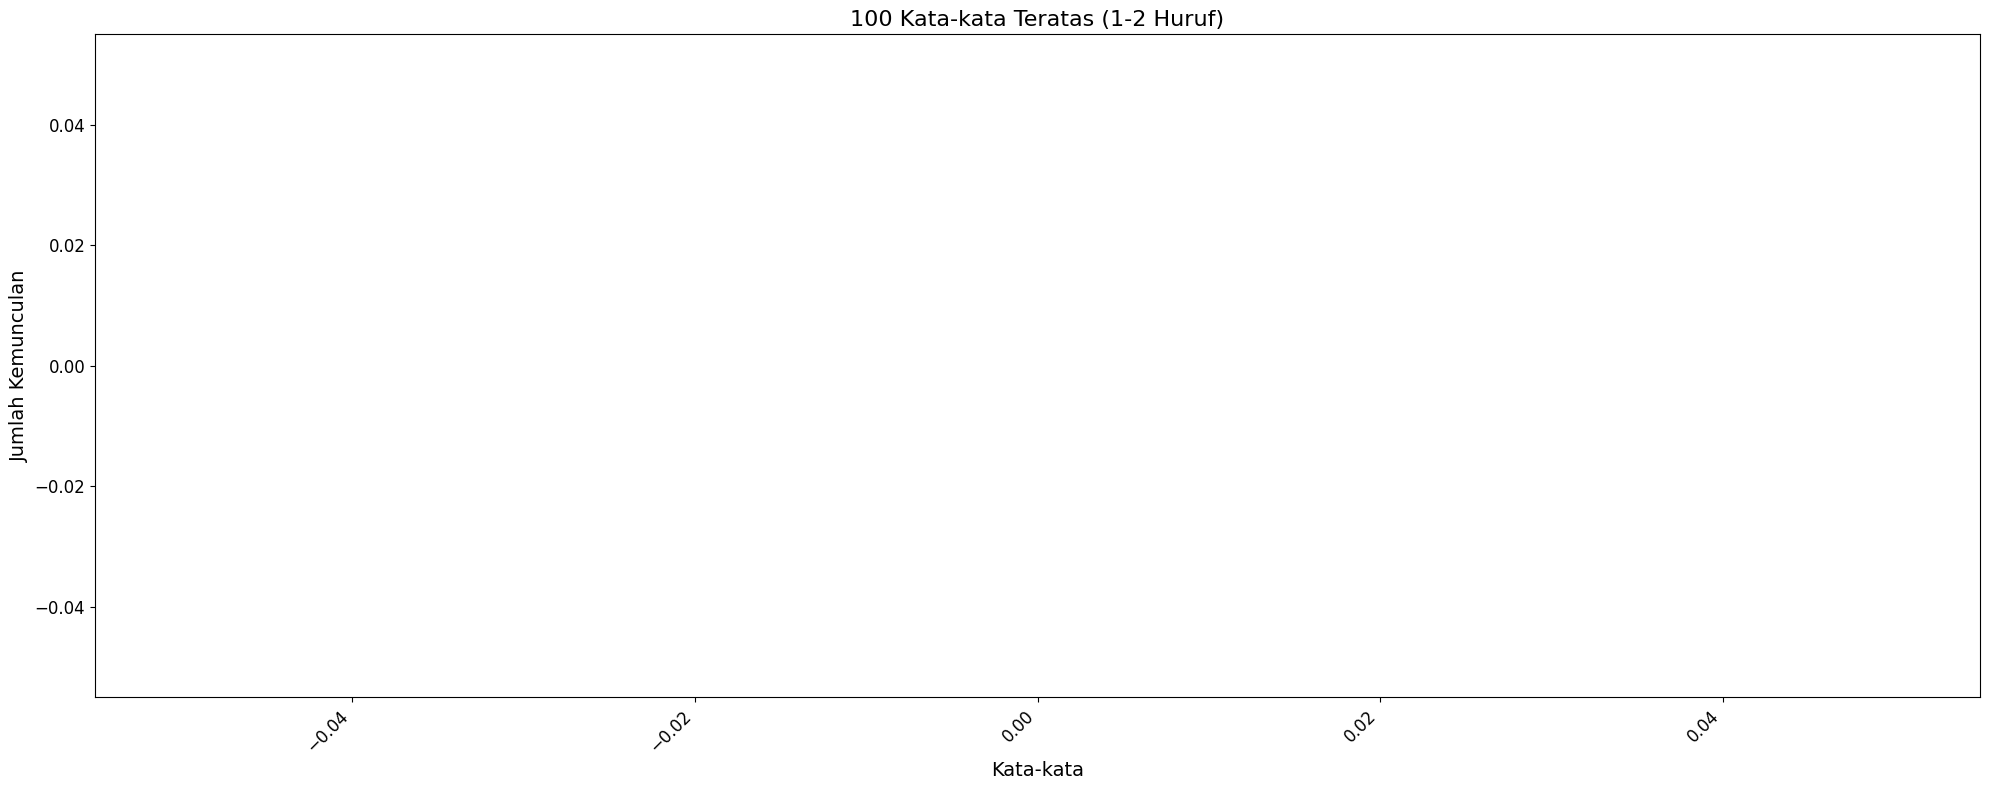

In [ ]:
import re

def remove_short_words(text):
    words = text.split()
    filtered_words = [word for word in words if len(word) > 2]
    return ' '.join(filtered_words)

# Menghapus kata-kata yang kurang dari 2 huruf
data_comment['Hasil_prepo'] = data_comment['Hasil_prepo'].apply(remove_short_words)

# Memisahkan setiap kalimat menjadi kolom-kolom terpisah
word_columns = data_comment['Hasil_prepo'].str.split(expand=True)

# Menghitung kata-kata yang paling banyak muncul setelah menghapus kata-kata yang kurang dari 2 huruf
word_counts = word_columns.stack().value_counts()

# Memilih 50 kata teratas yang hanya terdiri dari 2 huruf
filtered_words = word_counts[(word_counts.index.str.len() <= 2)].head(100)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(20, 8))
bars = plt.bar(filtered_words.index, filtered_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('100 Kata-kata Teratas (1-2 Huruf)', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

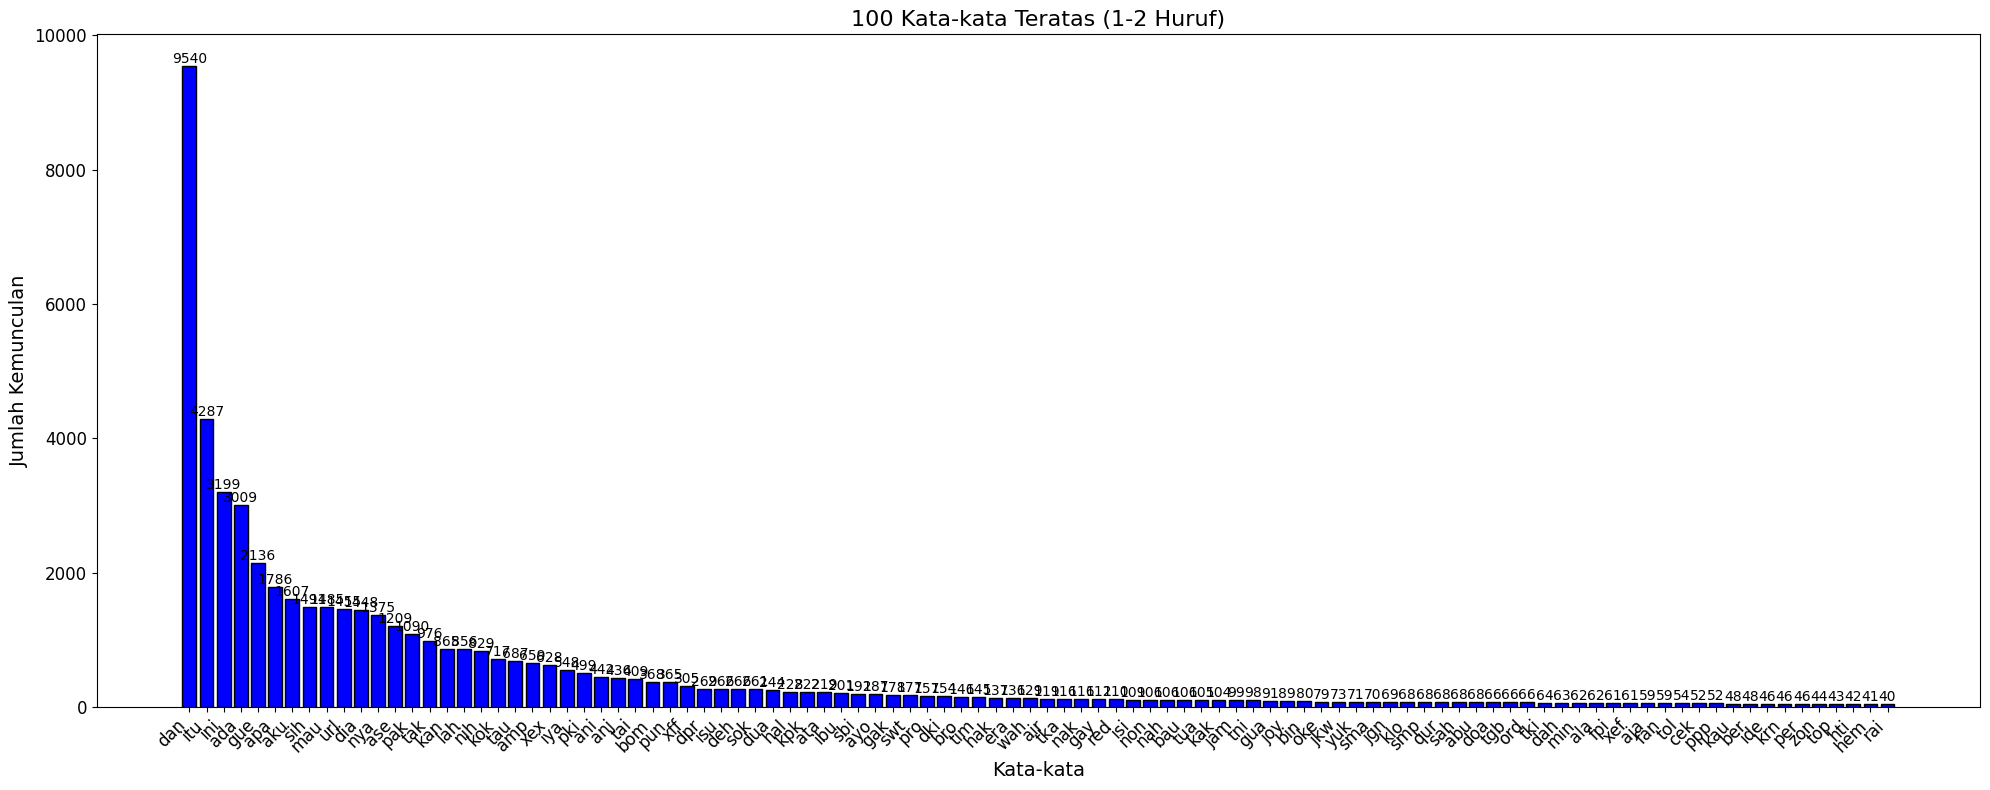

In [ ]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = data_comment['Hasil_prepo'].str.split(expand=True).stack().value_counts()

# Memilih 50 kata teratas yang hanya terdiri dari 1-3 huruf
filtered_words = word_counts[(word_counts.index.str.len() == 3)].head(100)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(20, 8))
bars = plt.bar(filtered_words.index, filtered_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('100 Kata-kata Teratas (1-2 Huruf)', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


In [ ]:
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace('gue', 'saya', case=False)
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace('xff', '', case=False)
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace('jgn', 'jangan', case=False)
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace('xef', '', case=False)
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace('ppp', '', case=False)
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace('krn', 'karena', case=False)

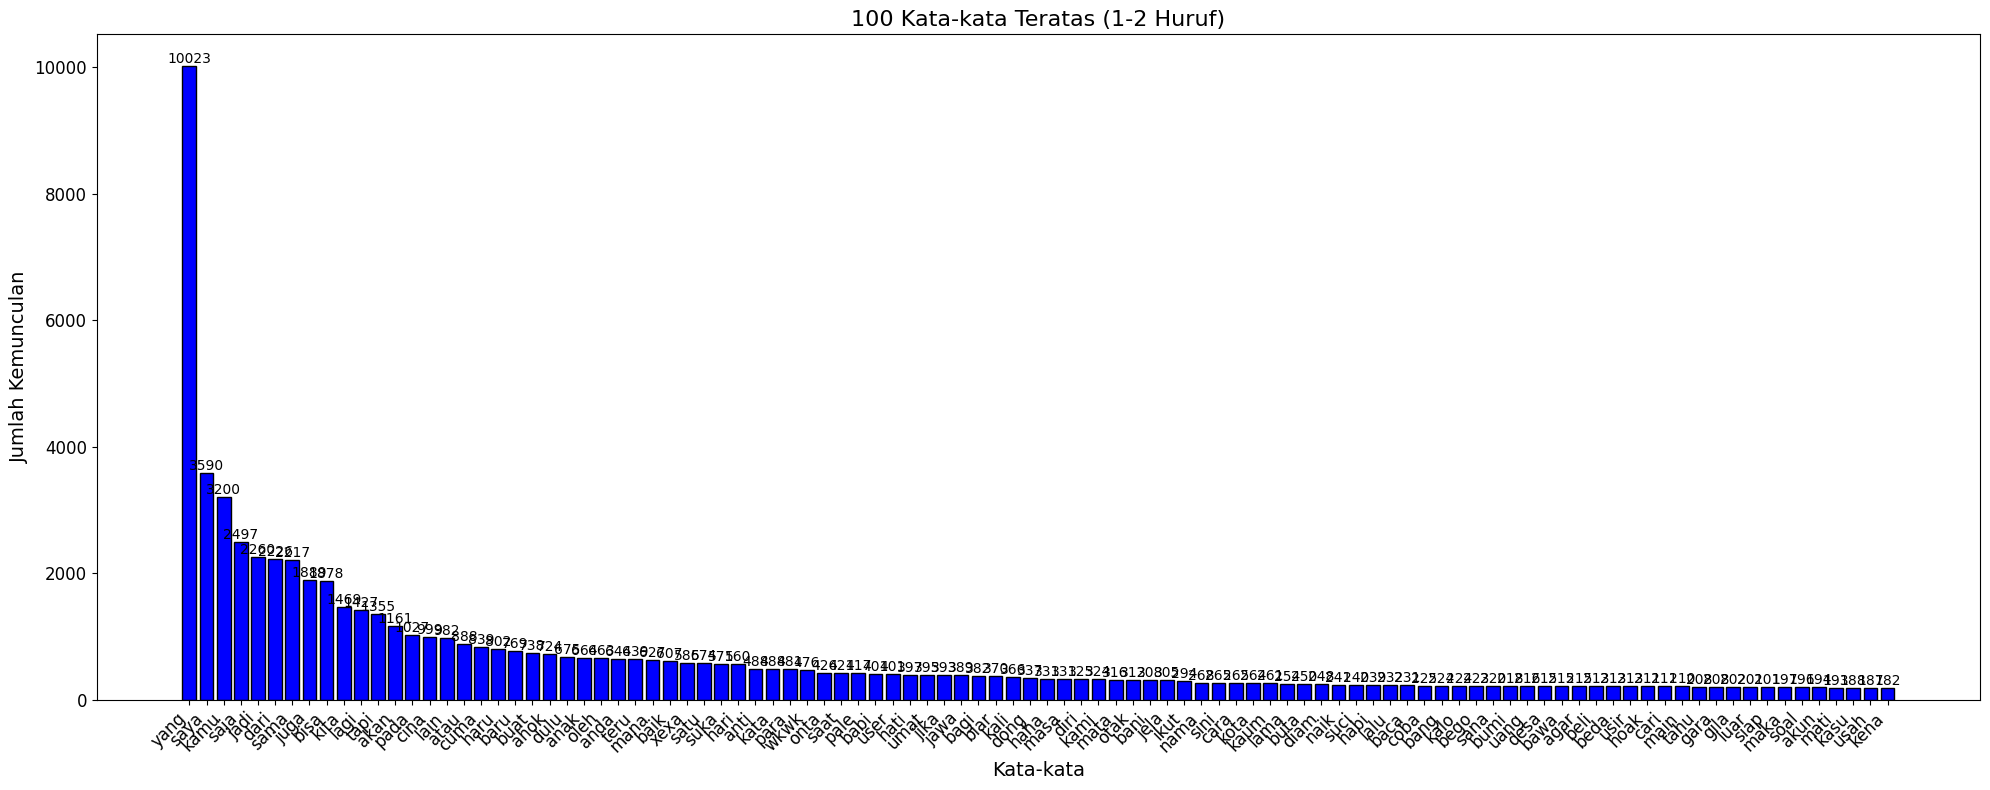

In [ ]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = data_comment['Hasil_prepo'].str.split(expand=True).stack().value_counts()

# Memilih 50 kata teratas yang hanya terdiri dari 1-3 huruf
filtered_words = word_counts[(word_counts.index.str.len() == 4)].head(100)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(20, 8))
bars = plt.bar(filtered_words.index, filtered_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('100 Kata-kata Teratas (1-2 Huruf)', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


In [ ]:
data_comment['Hasil_prepo']=data_comment['Hasil_prepo'].str.replace(' xexa ', '', case=False)

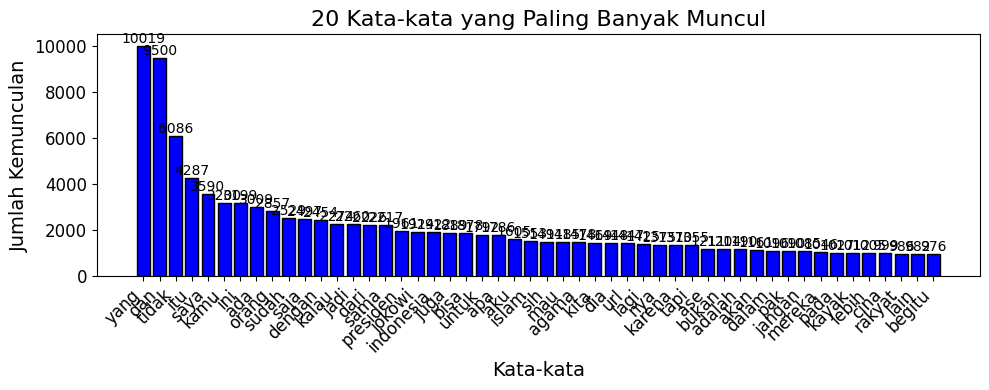

In [ ]:
# Menghitung kata-kata yang paling banyak muncul
word_counts = data_comment['Hasil_prepo'].str.split(expand=True).stack().value_counts()

# Memilih 20 kata teratas
top_words = word_counts.head(50)

# Membuat plot bar vertikal dengan warna biru, kotak, dan nilai di atas bar
plt.figure(figsize=(10, 4))
bars = plt.bar(top_words.index, top_words.values, color='blue', edgecolor='black')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('20 Kata-kata yang Paling Banyak Muncul', fontsize=16)
plt.xlabel('Kata-kata', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu x untuk penataan yang lebih baik
plt.yticks(fontsize=12)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

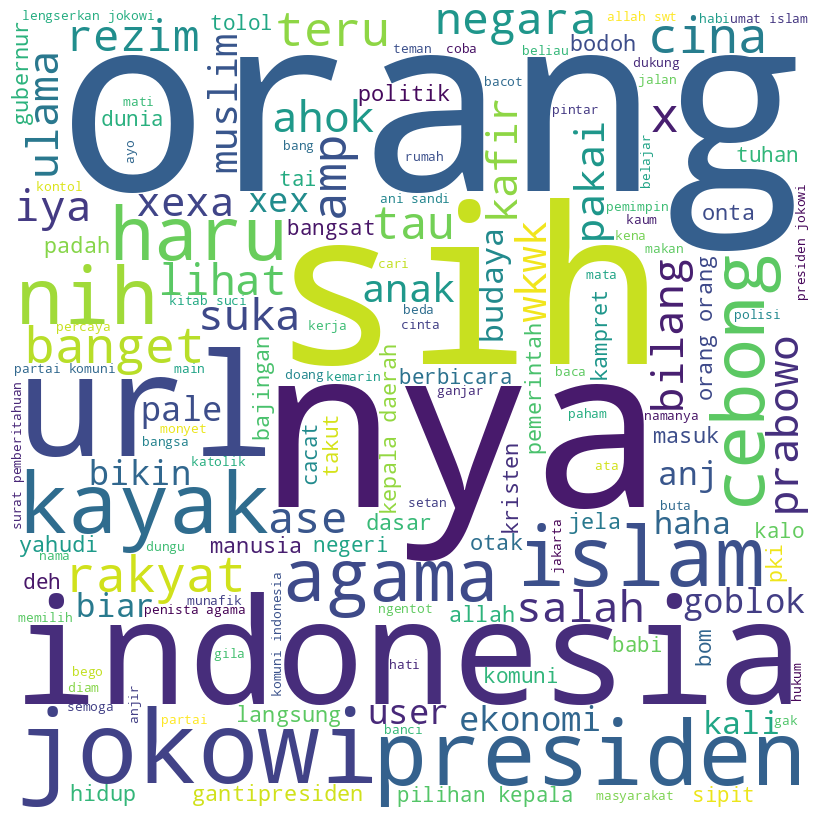

In [ ]:
# Assuming 'data_coment' is a DataFrame with a column 'Hasil_prepo'

comment_words = ''
stopwords_set = set(stopwords.words('indonesian'))

# iterate through the DataFrame
for val in data_comment['Hasil_prepo']:
    # typecast each val to string
    val = str(val)
    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords_set,
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
data_final=pd.DataFrame({"comment":data_comment['Hasil_prepo']})

In [ ]:
data_final['label']=dataku['label']

## **Checkpoint 2**

In [ ]:
data_final.to_csv('data_final.csv')

## **Modelling LSTM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
data_final = pd.read_csv('/content/data_final.csv')

In [ ]:
# Label encoding untuk kolom 'label'
le = LabelEncoder()
data_final['label'] = le.fit_transform(data_final['label'])

# Split data menjadi train dan test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data_final['comment'], data_final['label'], test_size=0.2, random_state=42
)

In [ ]:
# Tokenisasi
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data)

# Sequencing dan padding
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

train_padded = pad_sequences(train_sequences, maxlen=188, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=188, padding='post', truncating='post')

In [ ]:
from keras.callbacks import ModelCheckpoint
import os

# Definisi model
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=50),
    tf.keras.layers.Bidirectional(LSTM(64)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_path = 'youtube_v3.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Menyusun ModelCheckpoint callback
checkpoint = ModelCheckpoint(checkpoint_path,
                            monitor='val_accuracy',
                            save_weights_only=True,
                            mode='max',
                            verbose=1)

# Melatih model dengan menggunakan callback ModelCheckpoint
history = model.fit(train_padded, train_labels,
                    epochs=5,
                    validation_data=(test_padded, test_labels),
                    callbacks=[checkpoint])


Epoch 1/25
 27/662 [>.............................] - ETA: 23s - loss: 0.6753 - accuracy: 0.5972

KeyboardInterrupt: ignored

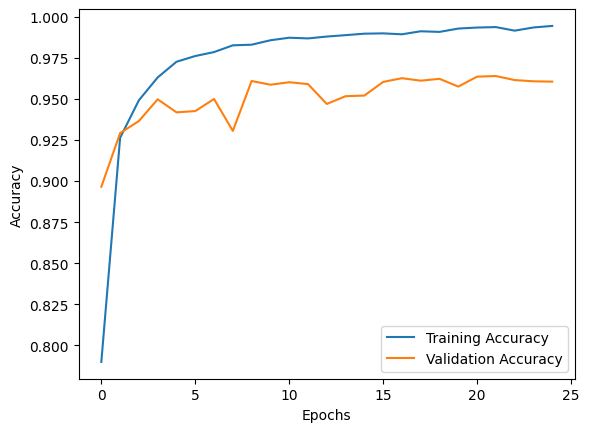

In [ ]:
# Plot akurasi training dan validasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from keras.models import load_model
# Memuat model yang telah disimpan
loaded_model = load_model('/content/1702096112.h5')  # Ganti 'best_model.h5' dengan nama file model yang sesuai

# Melakukan prediksi pada data uji
predictions = loaded_model.predict(test_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

# Evaluasi
accuracy = accuracy_score(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


InvalidArgumentError: ignored

In [ ]:
# Test sentence
test_sentence = "jelek"
# Convert the test sentence to a sequence
test_sequence = tokenizer.texts_to_sequences([test_sentence])
# Pad the sequence
padded_test = pad_sequences(test_sequence,padding='post',maxlen=50)
#Get the label based on probability 1 if p >= 0.5 else
prediction= model.predict(padded_test)
#Convert probability to label
pred_label = 1 if prediction >= 0.5 else 0
# Display the result
print("Test sentence: ", test_sentence)
print("Predicted sentiment: ", "Positive" if pred_label >= 0.5 else "Negative")

NameError: ignored

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalle

In [ ]:
import time
saved_model_path = "./model_youtube_v2.h5".format(int(time.time()))

model.save(saved_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2023-12-12 09:34:34.878898: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 09:34:34.878996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 09:34:34.880331: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 09:34:37.620864: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!zip submission.zip *.bin model_youtube_v2.json

	zip warning: name not matched: model_youtube_v2.json
  adding: group1-shard1of1.bin (deflated 7%)
